# Accessing Argo data by float using Argopy

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from argopy import DataFetcher as ArgoDataFetcher
plt.style.use('default')

argo_loader = ArgoDataFetcher()
argo_loader = ArgoDataFetcher(backend='erddap')
argo_loader = ArgoDataFetcher(cachedir='tmp')

In [2]:
apDS=argo_loader.float(6901254).to_xarray()

In [3]:
apDS2=argo_loader.profile(6901254,1).to_xarray()

In [4]:
data=apDS2.argo.point2profile()
data

<xarray.Dataset>
Dimensions:                (N_PROF: 2, N_LEVELS: 97)
Coordinates:
  * N_PROF                 (N_PROF) int64 0 1
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 5 6 ... 91 92 93 94 95 96
    LATITUDE               (N_PROF) float64 29.16 29.18
    LONGITUDE              (N_PROF) float64 -15.49 -15.43
    TIME                   (N_PROF) datetime64[ns] 2018-10-23T20:54:00 2018-1...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 1 1
    CYCLE_NUMBER           (N_PROF) int64 1 1
    DATA_MODE              (N_PROF) <U1 'R' 'R'
    DIRECTION              (N_PROF) <U1 'D' 'A'
    PLATFORM_NUMBER        (N_PROF) int64 6901254 6901254
    POSITION_QC            (N_PROF) int64 1 1
    ...                     ...
    PRES_QC                (N_PROF) int64 1 1
    PSAL                   (N_PROF, N_LEVELS) float64 36.69 36.71 ... 35.14
    PSAL_QC                (N_PROF) int64 1 1
    TEMP                   (N_PROF, N_LEVELS) float64 23.4 23.35 ... 4.559 4.474
    TEMP_QC                (N_PROF) int64 1 1
    TIME_QC                (N_PROF) int64 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           pvb
    Fetched_date:         2021/08/31
    Fetched_constraints:  phy;WMO6901254_CYC1
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [5]:
cy1  = xr.open_dataset('./Data/6901254/profiles/R6901254_001.nc')
cy1D = xr.open_dataset('./Data/6901254/profiles/R6901254_001D.nc')

The core-Argo profile files contain the core parameters provided by a float: pressure, temperature, salinity, conductivity (PRES, TEMP, PSAL, CNDC). All additional parameters are managed in B-Argo data files (see §0).   

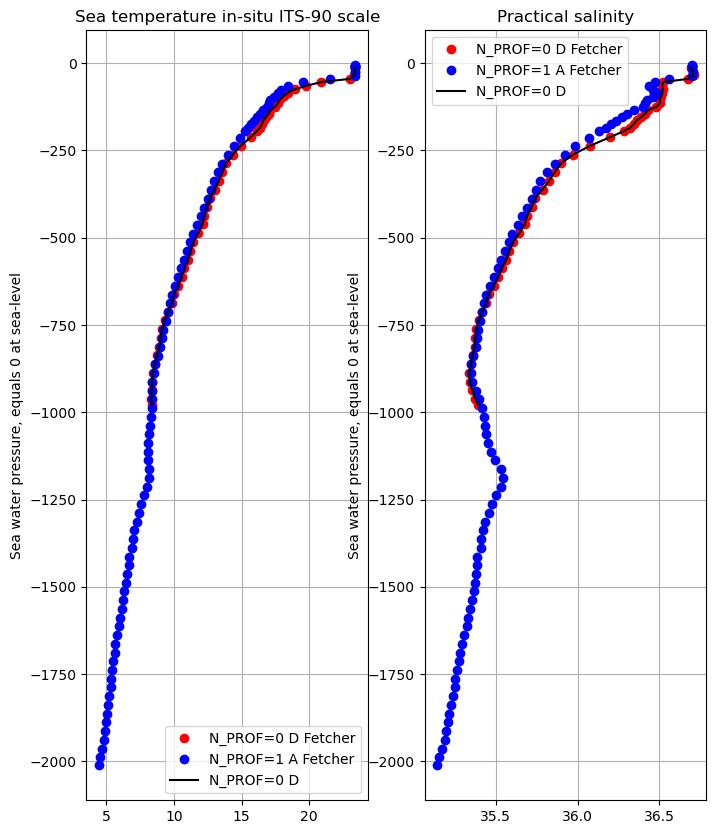

In [6]:
fig, ax = plt.subplots(1,2,figsize=(8,10))

#Temperature
ax[0].plot(data.TEMP[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[0].plot(data.TEMP[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[0].plot(cy1D.TEMP[0],-cy1D.PRES[0],'k-',label='N_PROF=0 D')
ax[0].set_title(cy1.TEMP.long_name)
ax[0].set_ylabel(cy1.PRES.long_name)
ax[0].grid()
ax[0].legend();

ax[1].plot(data.PSAL[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[1].plot(data.PSAL[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[1].plot(cy1D.PSAL[0],-cy1D.PRES[0],'k-',label='N_PROF=0 D')
ax[1].set_title(cy1.PSAL.long_name)
ax[1].set_ylabel(cy1.PRES.long_name)
ax[1].grid()
ax[1].legend();


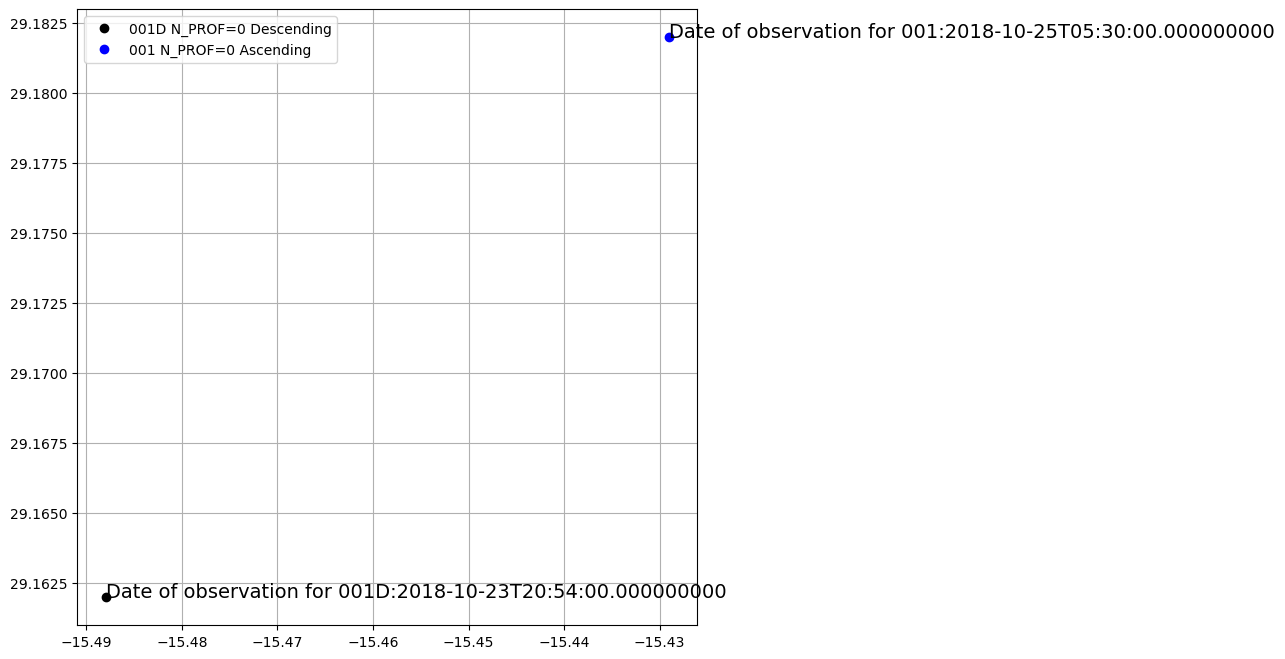

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(data.LONGITUDE[0],data.LATITUDE[0],'ko',label='001D N_PROF=0 Descending')
ax.plot(data.LONGITUDE[1],data.LATITUDE[1],'bo',label='001 N_PROF=0 Ascending')
#ax.set_title(cy1..long_name)
ax.text(data.LONGITUDE[0],cy1D.LATITUDE[0],'Date of observation for 001D:'+cy1D.JULD[0].values.astype(str), fontsize=14)
ax.text(data.LONGITUDE[1],cy1.LATITUDE[1],'Date of observation for 001:'+cy1.JULD[0].values.astype(str), fontsize=14)
ax.grid()
ax.legend();